**Lasso Regression:**


Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that uses L1 regularization to add a penalty equal to the absolute value of the coefficients to the loss function. This helps prevent overfitting by shrinking less important feature coefficients to zero, effectively performing automatic feature selection. It is particularly useful for datasets with many features, as it produces simpler and more interpretable models while improving generalization on unseen data. Lasso is widely used in machine learning to create efficient, sparse models that focus on the most important predictors.

**We install these packages because they provide essential functionality for data analysis, visualization, and model handling:**

1.   seaborn – A powerful Python library for statistical data visualization. It simplifies creating attractive plots like histograms, scatter plots, heatmaps, and more, which are useful for EDA, feature analysis, and model evaluation.
2.   joblib – A library for efficiently saving and loading machine learning models. It allows you to serialize trained models (like Ridge or Lasso regression) and reuse them later without retraining, which is essential for deployment or sharing models.



In [2]:
!pip install --quiet seaborn joblib #

**Setup and Importing Required Libraries for Lasso Regression:**

In this step, we prepare the Python environment for implementing Lasso Regression on the California Housing dataset. We import essential libraries such as numpy and pandas for numerical computations and data manipulation, matplotlib.pyplot and seaborn for data visualization, and joblib for saving and loading trained models efficiently. From sklearn, we import modules for dataset loading, preprocessing with StandardScaler, model training using LinearRegression, Lasso, and LassoCV, and model evaluation with metrics like mean_squared_error, mean_absolute_error, and r2_score, along with cross_val_score for cross-validation. Additionally, warnings.filterwarnings("ignore") is used to suppress unnecessary warnings, ensuring a clean and organized workflow from data exploration to model training, evaluation, and saving.

In [3]:
# Install & Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In this step, we load the California Housing dataset using fetch_california_housing from sklearn.datasets. The dataset is separated into features X (input variables for the model) and target y (the house prices we want to predict). We use pandas.DataFrame to structure the features and pandas.Series for the target, making them easy to manipulate and analyze. By displaying the first 5 rows of X and y, we get an initial view of the data, while checking the shapes of both datasets ensures we understand the number of samples and features, which is essential for subsequent preprocessing, model training, and evaluation steps.

In [4]:
# Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names) # The feature values (inputs for the model)
y = pd.Series(housing.target, name="PRICE") # The target values (what we want to predict, i.e., house prices)

# Check first 5 rows
print("Feature dataset (X):")
display(X.head())

print("\nTarget dataset (y):")
display(y.head())

# Dataset shapes
print("\nX shape:", X.shape)
print("y shape:", y.shape)


Feature dataset (X):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



Target dataset (y):


,PRICE
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422



X shape: (20640, 8)
y shape: (20640,)


This step generates summary statistics for all features in the dataset using X.describe(). It provides a quick overview of key metrics such as mean, standard deviation, minimum, maximum, and quartiles, helping us understand the data distribution and identify potential anomalies or outliers before model training.

In [5]:
# Summary statistics
print("Descriptive statistics:")
display(X.describe())

Descriptive statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


This step checks for any missing values in the feature dataset using X.isnull().sum(). Identifying missing data is crucial because it can affect model performance, and handling or imputing missing values ensures a clean dataset for accurate predictions.

In [6]:
# Missing values
print("\nMissing values in features:")
print(X.isnull().sum())


Missing values in features:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


This visualization shows the distribution of the target variable PRICE using a histogram with a Kernel Density Estimate (KDE). It helps understand the spread, skewness, and overall pattern of house prices, which is essential for selecting appropriate preprocessing and modeling strategies.

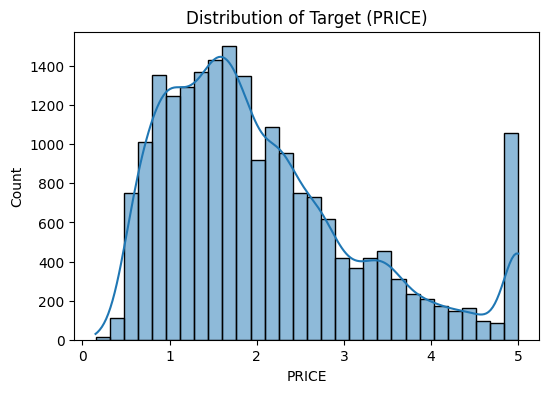

In [7]:
# Target distribution
plt.figure(figsize=(6,4))
sns.histplot(y, bins=30, kde=True)
plt.title("Distribution of Target (PRICE)")
plt.xlabel("PRICE")
plt.show()

This heatmap visualizes the correlation between all features in the dataset. By showing the strength and direction of linear relationships, it helps identify highly correlated features, potential multicollinearity, and insights for feature selection or engineering in regression modeling.

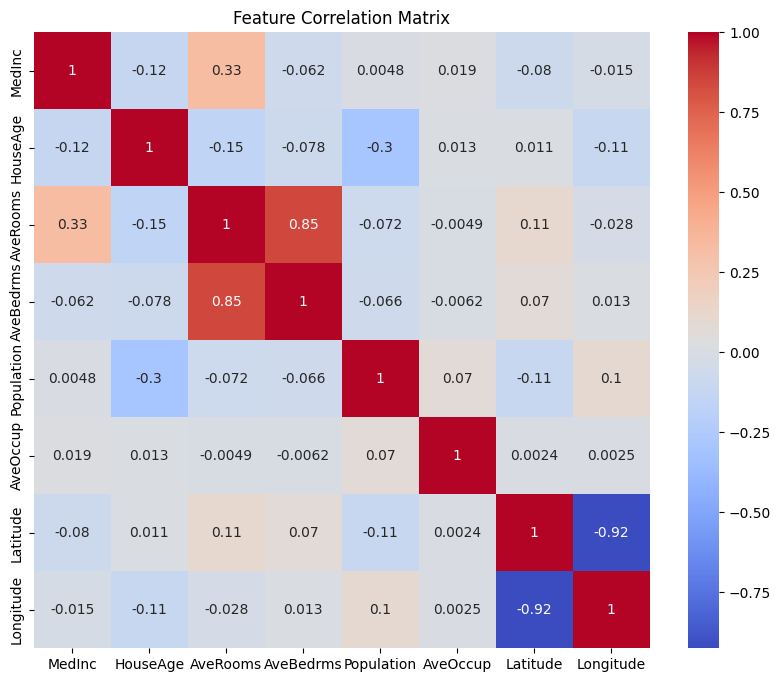

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Feature Correlation Matrix")
plt.show()

This pairplot visualizes relationships between selected features (MedInc, HouseAge, AveRooms) and the target (PRICE). It helps identify trends, correlations, and potential patterns, giving a clear understanding of how features interact with each other and with house prices.

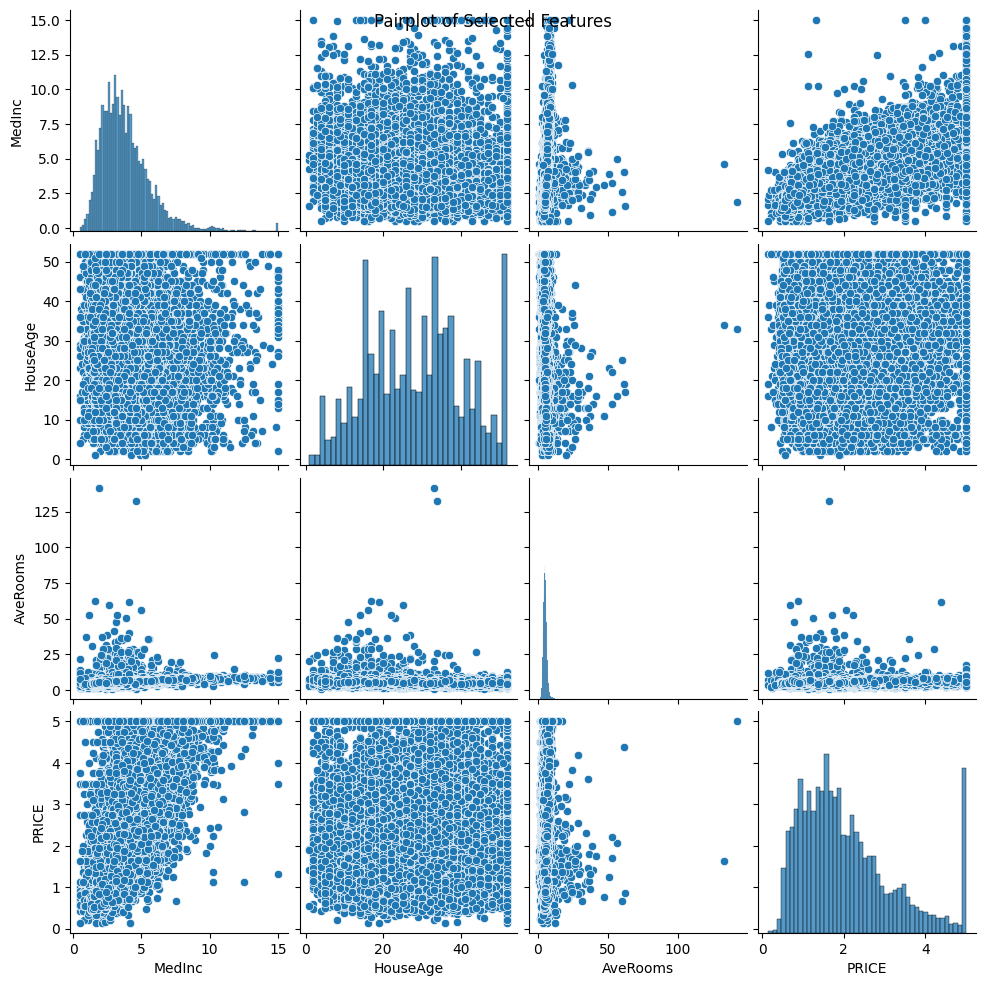

In [10]:
# Combine selected features from X and the target y into a new DataFrame
pairplot_data = X[['MedInc', 'HouseAge', 'AveRooms']].copy()
pairplot_data['PRICE'] = y

# Generate pairplot
sns.pairplot(pairplot_data)
plt.suptitle("Pairplot of Selected Features")
plt.show()

After creating new features, this step shows the first 5 rows of the updated dataset and summarizes the engineered features. Features like RoomsPerHousehold, BedroomsPerRoom, PopulationPerHousehold, MedInc_log, and Population_log help improve model performance by capturing more meaningful relationships and reducing skewness in the data.

In [11]:
# Feature Enginnering
# Example: creating new features
X['RoomsPerHousehold'] = X['AveRooms'] / X['AveOccup']
X['BedroomsPerRoom'] = X['AveBedrms'] / X['AveRooms']
X['PopulationPerHousehold'] = X['Population'] / X['AveOccup']

# Optional: log transform for skewed distributions
X['MedInc_log'] = np.log1p(X['MedInc'])
X['Population_log'] = np.log1p(X['Population'])


In [12]:
# Print first 5 rows after feature engineering
print("First 5 rows after Feature Engineering:")
print(X.head())

# Optional: check new columns summary statistics
print("\nSummary statistics for new features:")
print(X[['RoomsPerHousehold', 'BedroomsPerRoom', 'PopulationPerHousehold', 'MedInc_log', 'Population_log']].describe())


First 5 rows after Feature Engineering:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  RoomsPerHousehold  BedroomsPerRoom  PopulationPerHousehold  \
0    -122.23           2.732919         0.146591                   126.0   
1    -122.22           2.956685         0.155797                  1138.0   
2    -122.24           2.957661         0.129516                   177.0   
3    -122.25           2.283154         0.184458                   219.0   
4    -122.25           2.879646         0.172096                   259.0   

   MedInc_log  Population_log  
0    2.232720 

This step scales all features using StandardScaler to ensure they have a mean of ~0 and a standard deviation of ~1. Scaling is essential for regression models like Lasso, as it prevents features with larger ranges from dominating the model and ensures regularization works effectively. The first 5 rows and summary statistics confirm proper scaling.

In [13]:
# Scaling Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Print first 5 rows
print("Scaled Features:")
print(X_scaled_df.head())

# Print summary statistics to verify mean ~0 and std ~1
print("\nScaled Feature Summary:")
print(X_scaled_df.describe())


Scaled Features:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  RoomsPerHousehold  BedroomsPerRoom  PopulationPerHousehold  \
0  -1.327835           0.659647        -1.145833               -0.977033   
1  -1.322844           0.854906        -0.987175                1.669961   
2  -1.332827           0.855758        -1.440115               -0.843637   
3  -1.337818           0.267179        -0.493194               -0.733781   
4  -1.337818           0.787681        -0.706259               -0.629157   

   MedInc_log  Population_log  
0    1.995505       -1.69

**Train-Test Split and Feature Scaling:**

In this step, the dataset is split into training (80%) and testing (20%) sets to evaluate model performance on unseen data. The features are then scaled using StandardScaler to ensure consistent magnitude across all features, which is crucial for models like Lasso. The shapes of the scaled training and testing sets are printed to confirm proper splitting and scaling.

In [14]:
# Train and Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shapes after split and scaling:")
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)

Shapes after split and scaling:
X_train_scaled: (16512, 13)
X_test_scaled: (4128, 13)


In [15]:
# Baseline Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_lin = linreg.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print("--- Linear Regression Performance ---")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


--- Linear Regression Performance ---
MSE: 0.45332737553795327
RMSE: 0.6732959048872592
MAE: 0.4887987156015661
R² Score: 0.6540565708375239


Here, LassoCV is used to automatically select the optimal regularization parameter (alpha) through 5-fold cross-validation, testing a range of values on a logarithmic scale. Once the best alpha is found, a Lasso Regression model is trained on the scaled training data. Finally, predictions are generated on the scaled test set for model evaluation.

In [16]:
# Lasso Regression with Cross-Validation
# LassoCV to find best alpha
alphas = np.logspace(-4, 1, 50)
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_
print("Best alpha:", best_alpha)

# Train Lasso with best alpha
lasso = Lasso(alpha=best_alpha, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)


Best alpha: 0.00339322177189533


In this step, the Lasso Regression model’s performance is assessed using standard regression metrics. The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) measure the average squared difference and its root between predicted and actual values, showing prediction accuracy. The Mean Absolute Error (MAE) indicates average absolute deviations, while the R² Score quantifies how well the model explains the variance in house prices. These metrics together provide a comprehensive view of model performance.

In [17]:
# Model Evaluation
# Metrics
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print("--- Lasso Regression Performance ---")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R² Score:", r2)


--- Lasso Regression Performance ---
MSE: 0.4543927520987837
RMSE: 0.674086605785031
MAE: 0.48881557550122573
R² Score: 0.6532435601068889


**Lasso Regression Visualizations:**

1.  Actual vs Predicted Prices: The scatter plot compares the model’s predicted values against the true house prices. The red dashed line represents perfect predictions, helping identify over- or under-prediction trends. List item
2.   Feature Coefficients: The horizontal bar chart shows the magnitude and direction of each feature’s contribution in the Lasso model. Features with coefficients closer to zero are less important due to L1 regularization, which performs feature selection.
1.   Residuals Distribution: The histogram with a KDE overlay visualizes prediction errors (residuals). A roughly symmetric distribution around zero indicates that the model’s errors are balanced and unbiased.


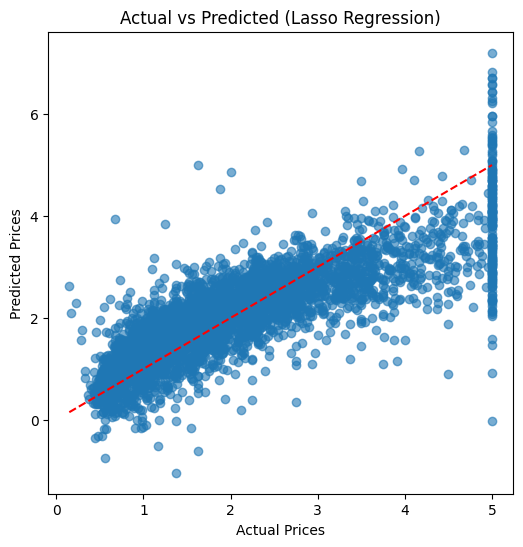

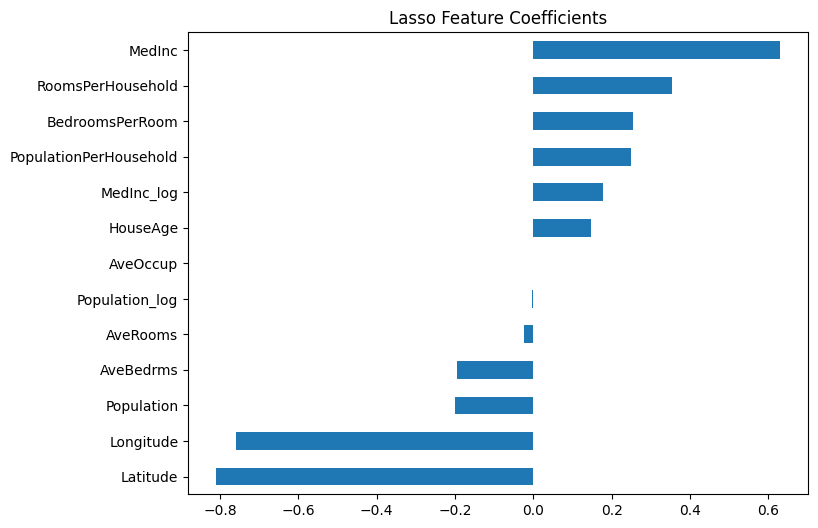

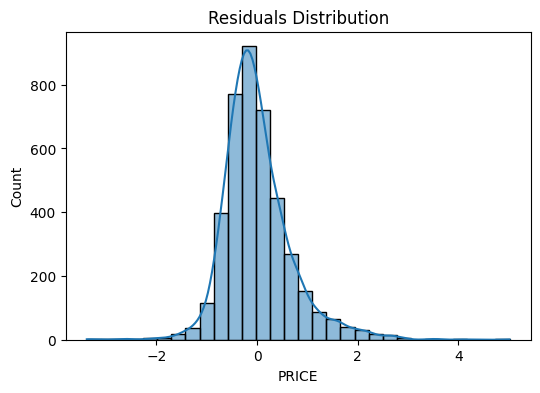

In [18]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Lasso Regression)")
plt.show()

# Coefficients
coef = pd.Series(lasso.coef_, index=X.columns)
plt.figure(figsize=(8,6))
coef.sort_values().plot(kind='barh')
plt.title("Lasso Feature Coefficients")
plt.show()

# Residuals
residuals = y_test - y_pred_lasso
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [19]:
# Save the Model
# Save scaler and model together
joblib.dump({"scaler": scaler, "model": lasso, "alpha": best_alpha}, "lasso_pipeline.joblib")
print("Saved Lasso pipeline to 'lasso_pipeline.joblib'")


Saved Lasso pipeline to 'lasso_pipeline.joblib'
